In [53]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [54]:
df = pd.read_csv("NAS.csv")                         #Read the csv
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)   

In [55]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
df.dropna(inplace=True)  #Dropping all columns with NaN
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [56]:
X = df[['Open']]
y= (df['Close']) 

In [57]:
# X = X.values.reshape(-1, 1)
# y = y.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
from sklearn import preprocessing
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [58]:
DTreeModel = DecisionTreeRegressor()
DTreeModel.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
d_pred = DTreeModel.predict(X_test)

y_test

Date
2010-01-15     71.131500
2009-05-08     33.423199
2008-07-30     29.138201
2007-10-12     79.987198
2016-09-23    171.401001
                 ...    
2017-12-20     99.812599
2009-08-07     33.566101
2013-12-12    107.583000
2015-08-20    205.681000
2019-07-11     39.070000
Name: Close, Length: 841, dtype: float64

In [60]:
from sklearn import metrics
print("D Tree Regressor")
print('Mean Squared Error :',metrics.mean_squared_error(y_test, DTreeModel.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, DTreeModel.predict(X_test)))
print("Score:", DTreeModel.score(X_test, y_test))

D Tree Regressor
Mean Squared Error : 9.076340242076974
Mean Absolute Error : 1.8609213014009638
Score: 0.9972092142615592


In [61]:
df2 = pd.DataFrame({'Actual': y_test, 'SGD': d_pred})
df2.sort_values(by='Date',inplace=True) 
df2

,Actual,SGD
Date,,
2003-12-18,19.139799,19.787299
2003-12-22,18.054300,19.282650
2003-12-23,17.425800,17.368667
2003-12-30,17.711500,17.117280
2004-01-05,17.711500,18.368501
...,...,...
2020-09-10,1.042500,1.044500
2020-09-11,1.044500,1.047500
2020-09-16,1.032500,1.047500


<AxesSubplot:xlabel='Date'>

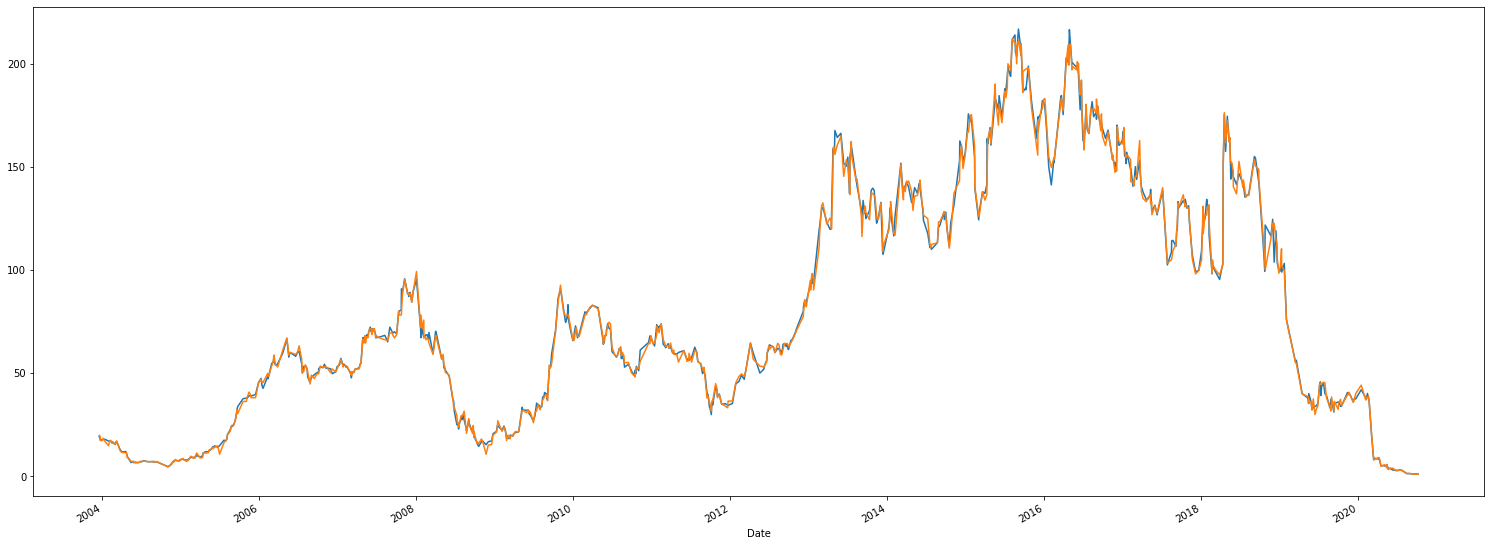

In [62]:
df2['Actual'].plot(figsize=(26,10))
df2['SGD'].plot(figsize=(26,10))